# Homework 2

# Set up

## Installing packages

In [1]:
!pip install requests PyPDF2 gdown
!pip install 'markitdown[pdf]'
!pip install langchain_mcp_adapters langchain_google_genai langchain-openai

## Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `VERTEX_API_KEY`.


1.   Look for the key icon on the left panel of your colab.
2.   Under `Name`, create `VERTEX_API_KEY`.
3. Copy your key to `Value`.

If you cannot use VERTEX_API_KEY, you can use deepseek models via `DEEPSEEK_API_KEY`. It does not affect your score.



In [2]:
from google.colab import userdata
GEMINI_VERTEX_API_KEY = userdata.get('VERTEX_API_KEY')

# Download sample CVs

## Downloading sample_cv.pdf
The codes below download the sample CV


In [3]:
import os
import gdown

folder_id = "1adYKq7gSSczFP3iikfA8Er-HSZP6VM7D"
folder_url = f"https://drive.google.com/drive/folders/{folder_id}"

output_dir = "downloaded_cvs"
os.makedirs(output_dir, exist_ok=True)

gdown.download_folder(
    url=folder_url,
    output=output_dir,
    quiet=False,
    use_cookies=False
)

Retrieving folder contents


Processing file 1NR1RUKx4GyM7QOBxKXkfh4e8jUkxFCsp CV_1.pdf
Processing file 16lrd-uO8AAnCnv7UG9Rs_Nk6SUu0Iwbs CV_2.pdf
Processing file 15hVEuBan_EKhEty2aZBd6rcpDpP4o7Vr CV_3.pdf
Processing file 1Y2w_mAUEhg4vZBdvvR-0n3Jf2mKuGDRk CV_4.pdf
Processing file 1PLwkva-pdua6ZVvmLg9mxHeljq9D8C_C CV_5.pdf


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1NR1RUKx4GyM7QOBxKXkfh4e8jUkxFCsp
To: /content/downloaded_cvs/CV_1.pdf
100%|██████████| 147k/147k [00:00<00:00, 18.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=16lrd-uO8AAnCnv7UG9Rs_Nk6SUu0Iwbs
To: /content/downloaded_cvs/CV_2.pdf
100%|██████████| 75.1k/75.1k [00:00<00:00, 6.66MB/s]
Downloading...
From: https://drive.google.com/uc?id=15hVEuBan_EKhEty2aZBd6rcpDpP4o7Vr
To: /content/downloaded_cvs/CV_3.pdf
100%|██████████| 72.0k/72.0k [00:00<00:00, 8.63MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y2w_mAUEhg4vZBdvvR-0n3Jf2mKuGDRk
To: /content/downloaded_cvs/CV_4.pdf
100%|██████████| 73.3k/73.3k [00:00<00:00, 49.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PLwkva-pdua6ZVvmLg9mxHeljq9D8C_C
To: /content/downloaded_cvs/CV_5.pdf
100%|██████████| 97.9k/97.9k [00:00<00:00, 60.1MB/s]
Download complete

['downloaded_cvs/CV_1.pdf',
 'downloaded_cvs/CV_2.pdf',
 'downloaded_cvs/CV_3.pdf',
 'downloaded_cvs/CV_4.pdf',
 'downloaded_cvs/CV_5.pdf']

In [4]:
# =====================================================
#  Load and display all CV PDFs in order
# =====================================================
import os
from markitdown import MarkItDown

cv_dir = "downloaded_cvs"

# Initialize MarkItDown
md = MarkItDown(enable_plugins=False)

# Collect and sort PDFs numerically
pdf_files = sorted(
    [f for f in os.listdir(cv_dir) if f.lower().endswith(".pdf")],
    key=lambda x: int("".join(filter(str.isdigit, x)))  # CV_1.pdf → 1
)

all_cvs = []

for pdf_name in pdf_files:
    pdf_path = os.path.join(cv_dir, pdf_name)
    result = md.convert(pdf_path)

    all_cvs.append({
        "file": pdf_name,
        "text": result.text_content
    })

    print("=" * 80)
    print(f"📄 {pdf_name}")
    print("=" * 80)
    print(result.text_content)
    print("\n\n")


📄 CV_1.pdf
|     |     |     |     | John         |           | Smith        |                   |     |     |
| --- | --- | --- | --- | ------------ | --------- | ------------ | ----------------- | --- | --- |
|     |     |     |     | Marketing    |           | Professional |                   |     |     |
|     |     |     |     | + Singapore, | Singapore |              | (cid:209) Kowloon |     |     |
Experience
|                |                  |     |          |                     |              |            |     | 2020 – | Present |
| -------------- | ---------------- | --- | -------- | ------------------- | ------------ | ---------- | --- | ------ | ------- |
| Engineer,      | ByteDance        |     |          |                     |              |            |     |        |         |
| • Worked       | in a fast-paced, |     | global   | technology          | environment. |            |     |        |         |
| • Collaborated | across           |     | teams to | sup

# Connect to our MCP server

Documentation about MCP: https://modelcontextprotocol.io/docs/getting-started/intro.

Using MCP servers in Langchain https://docs.langchain.com/oss/python/langchain/mcp.

## Check which tools that the MCP server provide

In [5]:
import asyncio
import json
from langchain_mcp_adapters.client import MultiServerMCPClient

client = MultiServerMCPClient({
    "social_graph": {
        "transport": "http",
        "url": "https://ftec5660.ngrok.app/mcp",
        "headers": {"ngrok-skip-browser-warning": "true"}
    }
})

mcp_tools = await client.get_tools()
for tool in mcp_tools:
    print(tool.name)
    print(tool.description)
    print(tool.args)
    print("\n\n------------------------------------------------------\n\n")

search_facebook_users
Search for Facebook users by display name (supports partial and fuzzy matching).

Args:
    q: Search query string (case-insensitive, matches any part of display name)
       Examples: "John", "john smith", "Smith"
    limit: Maximum number of results to return (default: 20, max: 20)
    fuzzy: Enable fuzzy matching if exact search returns no results (default: True)

Returns:
    List of user dictionaries, each containing:
    - id (int): Unique Facebook user ID for use with get_facebook_profile()
    - display_name (str): User's Facebook display name (may differ from legal name)
    - city (str): Current city of residence
    - country (str): Country of residence
    - match_type (str): "exact" or "fuzzy" (indicates search method used)
    
    Returns empty list [] if no matches found.

Example:
    search_facebook_users("Alex Chan", limit=5)
    → [{"id": 123, "display_name": "Alex Chan", "city": "Hong Kong", "country": "Hong Kong", "match_type": "exact"}]
    

## A simple agent using tools from the MCP server


In [6]:
import os
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_mcp_adapters.client import MultiServerMCPClient

# ---------------------------
# 1. Define a local tool
# ---------------------------
@tool
def say_hello(name: str) -> str:
    """Say hello to a person by name."""
    return f"Hello, {name}! 👋"

# ---------------------------
# 2. Load MCP tools + merge
# ---------------------------
client = MultiServerMCPClient({
    "social_graph": {
        "transport": "http",
        "url": "https://ftec5660.ngrok.app/mcp",
        "headers": {"ngrok-skip-browser-warning": "true"}
    }
})

mcp_tools = await client.get_tools()
tools = mcp_tools + [say_hello]

# ---------------------------
# 3. Initialize Gemini (tool-enabled) or deepseek
# ---------------------------
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    google_api_key=GEMINI_VERTEX_API_KEY,
    temperature=0,
)

# from langchain_openai import ChatOpenAI
# DEEPSEEK_API_KEY = userdata.get("DEEPSEEK_API_KEY")
# llm = ChatOpenAI(
#     model="deepseek-chat",          # or "deepseek-reasoner"
#     api_key=DEEPSEEK_API_KEY,
#     base_url="https://api.deepseek.com/v1",
#     temperature=0,
# )

llm_with_tools = llm.bind_tools(tools)

# ---------------------------
# 4. Single-step invocation
# ---------------------------
query = "Say hello to Bao using tool, then search for someone named Alice on Facebook."

response = llm_with_tools.invoke([
    HumanMessage(content=query)
])

print(response)

content='' additional_kwargs={'function_call': {'name': 'search_facebook_users', 'arguments': '{"q": "Alice"}'}} response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'} id='lc_run--019c953f-6309-7740-ba0d-413e973db840-0' tool_calls=[{'name': 'say_hello', 'args': {'name': 'Bao'}, 'id': 'd8bf6489-c299-488c-8d12-b66641ae22d6', 'type': 'tool_call'}, {'name': 'search_facebook_users', 'args': {'q': 'Alice'}, 'id': '327c101c-ac39-4cfc-8882-20fd50329925', 'type': 'tool_call'}] invalid_tool_calls=[] usage_metadata={'input_tokens': 2852, 'output_tokens': 33, 'total_tokens': 2885, 'input_token_details': {'cache_read': 0}}


# LangGraph Approach Implementation


In [7]:
import asyncio
import json
from typing import TypedDict, List, Dict, Any
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, END

# =====================================================
# 1. Prepare Tools and Define State
# =====================================================
# Convert tools to a dictionary for precise calling within nodes
tool_map = {t.name: t for t in mcp_tools}

class VerificationState(TypedDict):
    cv_text: str
    extracted_info: Dict[str, Any]
    linkedin_data: Dict[str, Any]
    facebook_data: Dict[str, Any]
    discrepancies: List[str]
    report_content: str
    final_score: float

# =====================================================
# 2. Define Structured Output Formats (Pydantic Models)
# =====================================================
class CVInfo(BaseModel):
    name: str = Field(description="Candidate's full name. Extract ONLY the first and last name (e.g., 'Rahul Sharma'). Remove any titles like PhD.")
    industry: str = Field(default="", description="The primary industry sector from the headline. Use broad terms like 'Design', 'Software', 'AI', 'Consulting'.")

class ProfileSelection(BaseModel):
    selected_id: int = Field(description="The integer ID of the most similar profile.")
    reasoning: str = Field(description="A brief explanation of why this profile was selected based on overlapping experience and education.")
    match_confidence: str = Field(description="Confidence level that this is the exact same person. Must be strictly one of: 'high', 'moderate', or 'low'.")

class VerificationResult(BaseModel):
    discrepancies: List[str] = Field(description="List of specific discrepancies found within the CV and against social profiles. Include confidence notes.")
    report_content: str = Field(description="A short summary report of the verification findings.")
    final_score: float = Field(description="A float score between 0.0 and 1.0 representing confidence in the CV's validity.")

# =====================================================
# 3. Helper: MCP Result Parser (Simplified Version)
# =====================================================
def parse_mcp_result(res: Any) -> Any:
    """Extracts and parses the JSON string from the specific MCP return format."""
    try:
        # Expecting the exact format: [{'type': 'text', 'text': '[{"id":...}]', 'id': '...'}]
        # Directly targets the 'text' key inside the first element of the list
        json_string = res[0]['text']
        return json.loads(json_string)
    except (IndexError, KeyError, TypeError, json.JSONDecodeError) as e:
        # Returns an empty list if the format is unexpected or parsing fails
        return []

# =====================================================
# 4. Define LangGraph Nodes
# =====================================================
async def extract_node(state: VerificationState):
    print("   -> [Node 1] Extracting CV information (Strict Mode)...")
    llm_structured = llm.with_structured_output(CVInfo)
    try:
        prompt = f"""
        Extract the candidate's name and primary industry（headline） from this CV.
        CRITICAL: The extracted values will be used as direct API search queries. Keep strings concise.

        [CV Text]
        {state['cv_text']}
        """
        res = await llm_structured.ainvoke(prompt)

        cleaned_info = {
            "name": res.name.strip(),
            "industry": res.industry.strip()
        }

        print(f"      [Log] Cleaned Extracted Info: {cleaned_info}")
        return {"extracted_info": cleaned_info}

    except Exception as e:
        print(f"      [Warning] Extraction failed: {e}")
        return {"extracted_info": {"name": "Unknown", "industry": ""}}


async def linkedin_node(state: VerificationState):
    print("   -> [Node 2] Querying LinkedIn (Multi-Agent: Retrieve & Select Mode)...")
    info = state.get("extracted_info", {})
    name = info.get("name", "Unknown")
    industry = info.get("industry", "")

    if name == "Unknown":
        return {"linkedin_data": {"error": "No name extracted."}}

    # Step 1: Broad Retrieval (Top-5)
    search_args = {'q': name, 'limit': 5, 'fuzzy': True}
    if industry:
        search_args['industry'] = industry

    print(f"      [Log] LinkedIn Retrieve: Searching with args -> {search_args}")

    try:
        raw_res = await tool_map["search_linkedin_people"].ainvoke(search_args)
        parsed_res = parse_mcp_result(raw_res)

        if not parsed_res or not isinstance(parsed_res, list) or len(parsed_res) == 0:
            print("      [Warning] LinkedIn search returned 0 candidates.")
            return {"linkedin_data": {"status": "No candidates found."}}

        print(f"      [Log] Found {len(parsed_res)} candidate(s). Expanding full profiles...")

        # Step 2: Expand Full Profiles
        expanded_profiles = []
        for candidate in parsed_res:
            pid = candidate.get("id")
            if pid is not None:
                raw_profile = await tool_map["get_linkedin_profile"].ainvoke({"person_id": pid})
                profile_data = parse_mcp_result(raw_profile)
                if profile_data and isinstance(profile_data, dict) and "error" not in profile_data:
                    expanded_profiles.append(profile_data)

        if not expanded_profiles:
            return {"linkedin_data": {"status": "Failed to fetch full profiles."}}

        # Step 3: LLM Intelligent Decision & Confidence Scoring
        print(f"      [Log] Calling LLM to select best match and evaluate confidence...")

        selection_prompt = f"""
        You are an expert identity resolution analyst.

        You are given:
        - A candidate CV
        - {len(expanded_profiles)} possible LinkedIn profiles

        Your job has ONLY TWO TASKS:
        1) Select the single MOST SIMILAR profile.
        2) Assign identity_confidence: 'high', 'moderate', or 'low'.

        DO NOT evaluate honesty. DO NOT judge lies. Only determine identity similarity.

        HOW TO SELECT MOST SIMILAR:
        Compare explicit overlaps only:
        - Name
        - Location (same city preferred over same country)
        - Education (same university name preferred over same degree level)
        - Work experience (same company, same job title, overlapping years)

        Choose the profile with the highest number of strong overlaps.

        IDENTITY_CONFIDENCE RULES (STRICT):

        HIGH:
        - Name matches AND
        - At least THREE strong anchors match explicitly, such as:
            • Same university name
            • Same company name
            • Same city + same company
            • Multiple experiences with consistent overlapping years
        - Timelines do NOT contradict.

        MODERATE:
        - Name matches AND
        - At least ONE strong anchor matches
        - Remaining overlaps are partial or generic.

        LOW:
        - Only name matches
        - Or overlaps are generic (country only, degree level only, common titles like Engineer/Manager)
        - Or timelines significantly differ.

        IMPORTANT:
        - Do NOT speculate.
        - Do NOT assume career changes.
        - Use only explicit information shown in both CV and profile.

        OUTPUT FORMAT:
        Return:
        - selected_id (must be one of the provided profile IDs)
        - reasoning (2–4 sentences listing explicit overlaps only)
        - match_confidence ('high', 'moderate', or 'low')

        [Original CV]
        {state['cv_text']}

        [Candidate LinkedIn Profiles]
        {json.dumps(expanded_profiles, indent=2, ensure_ascii=False)}
        """

        llm_selector = llm.with_structured_output(ProfileSelection)
        selection_res = await llm_selector.ainvoke(selection_prompt)

        selected_profile = next((p for p in expanded_profiles if p.get("id") == selection_res.selected_id), None)

        if selected_profile:
            print(f"      [Success] Selected ID: {selection_res.selected_id} | Confidence: {selection_res.match_confidence} | Reason: {selection_res.reasoning}")
            selected_profile["_agent_match_confidence"] = selection_res.match_confidence
            selected_profile["_agent_selection_reasoning"] = selection_res.reasoning
            return {"linkedin_data": selected_profile}
        else:
            print(f"      [Warning] LLM selected invalid ID. Defaulting to first candidate with 'low' confidence.")
            expanded_profiles[0]["_agent_match_confidence"] = "low"
            return {"linkedin_data": expanded_profiles[0]}

    except Exception as e:
        print(f"      [Warning] LinkedIn Node encountered an error: {e}")
        return {"linkedin_data": {"status": "Error during processing."}}


async def facebook_node(state: VerificationState):
    print("   -> [Node 3] Querying Facebook (Multi-Agent: Retrieve & Select Mode)...")
    name = state.get("extracted_info", {}).get("name", "Unknown")

    if name == "Unknown":
        print("      [Log] Skipping Facebook search due to missing name.")
        return {"facebook_data": {"error": "No name extracted."}}

    search_args = {"q": name, "limit": 5, "fuzzy": True}
    print(f"      [Log] Facebook Retrieve: Searching with args -> {search_args}")

    try:
        raw_res = await tool_map["search_facebook_users"].ainvoke(search_args)
        parsed_res = parse_mcp_result(raw_res)

        if not parsed_res or not isinstance(parsed_res, list) or len(parsed_res) == 0:
            print("      [Warning] Facebook search returned 0 candidates.")
            return {"facebook_data": {"status": "No candidates found."}}

        print(f"      [Log] Found {len(parsed_res)} Facebook candidate(s). Expanding full profiles...")

        expanded_profiles = []
        for candidate in parsed_res:
            uid = candidate.get("id")
            if uid is not None:
                raw_profile = await tool_map["get_facebook_profile"].ainvoke({"user_id": uid})
                profile_data = parse_mcp_result(raw_profile)
                if profile_data and isinstance(profile_data, dict) and "error" not in profile_data:
                    expanded_profiles.append(profile_data)

        if not expanded_profiles:
            return {"facebook_data": {"status": "Failed to fetch full Facebook profiles."}}

        print(f"      [Log] Calling LLM to select best match and evaluate confidence...")

        selection_prompt = f"""
        You are an expert identity resolution analyst for sparse Facebook profiles.

        You are given a candidate CV and {len(expanded_profiles)} possible Facebook profiles.
        Your job has ONLY TWO TASKS:
        1) Select the single MOST SIMILAR profile (same person).
        2) Output match_confidence: 'high', 'moderate', or 'low'.

        Use ONLY explicit overlaps. Do NOT speculate.
        CRITICAL: If your reasoning mentions bio/posts/interests/friends/friend_count, your answer is invalid.

        STRONG ANCHORS (Facebook):
        - Explicit school name match (rare but strongest)
        - Explicit company name match
        - Same city/country PLUS one of (school name match OR company name match)

        WEAK SIGNALS (never enough alone):
        - Education level only (e.g., "Bachelor's Degree", "Doctoral Degree")
        - Generic job titles (Scientist/Engineer/Manager/Analyst) without matching company
        - City-only or country-only matches

        HOW TO SELECT MOST SIMILAR:
        Pick the profile with the most STRONG ANCHORS.
        Tie-breaker: school name match > company name match > city/country match > hometown > education level.

        MATCH_CONFIDENCE RULES (STRICT):
        - high:
          Name matches AND (school name match OR company name match) AND at least one additional STRONG anchor (e.g., same city/country).
          If there is NO explicit school name match AND NO explicit company name match, you MUST NOT output 'high'.
        - moderate:
          Name matches AND strong location match (same city/country) PLUS at least one weak supporting signal (hometown or education level).
        - low:
          Only weak/generic overlaps (name only, city only, education level only, generic job title only).

        OUTPUT FORMAT (must follow exactly):
        Return:
        - selected_id (one of the provided Facebook user ids)
        - reasoning (2–4 sentences listing explicit overlaps only)
        - match_confidence ('high'|'moderate'|'low')

        [CV]
        {state['cv_text']}

        [Facebook Profiles JSON]
        {json.dumps(expanded_profiles, indent=2, ensure_ascii=False)}
        """

        llm_selector = llm.with_structured_output(ProfileSelection)
        selection_res = await llm_selector.ainvoke(selection_prompt)

        selected_profile = next((p for p in expanded_profiles if p.get("id") == selection_res.selected_id), None)

        if selected_profile:
            print(f"      [Success] Selected ID: {selection_res.selected_id} | Confidence: {selection_res.match_confidence} | Reason: {selection_res.reasoning}")
            selected_profile["_agent_match_confidence"] = selection_res.match_confidence
            selected_profile["_agent_selection_reasoning"] = selection_res.reasoning
            return {"facebook_data": selected_profile}
        else:
            print(f"      [Warning] LLM selected invalid ID. Defaulting to first candidate with 'low' confidence.")
            expanded_profiles[0]["_agent_match_confidence"] = "low"
            return {"facebook_data": expanded_profiles[0]}

    except Exception as e:
         print(f"      [Warning] Facebook Node encountered an error: {e}")
         return {"facebook_data": {"status": "Error during processing."}}


async def score_node(state: VerificationState):
    print("   -> [Node 4] Cross-checking and scoring (Applying Categorical Confidence penalty)...")
    prompt = f"""
    You are an expert KYC verification scoring AI.
    Your goal: output a RELIABILITY score for how valid/trustworthy the CV is.

    IMPORTANT CONTEXT:
    - LinkedIn/Facebook profiles are REFERENCE SIGNALS, not guaranteed ground-truth.
    - Absence of evidence is NOT evidence of lying.

    NON-NEGOTIABLE RULES (TA guideline):
    1) CV is the baseline. INTERNAL inconsistencies must reduce score, but must NOT automatically force score < 0.50 by themselves.
    2) External mismatches are meaningful ONLY when the profile match_confidence is HIGH.
    3) If a CV claim is not present on a social profile, classify it as MISSING EVIDENCE (not CONFLICT).

    STEP 1 — READ MATCH CONFIDENCE:
    Use the field '_agent_match_confidence' if present in LinkedIn/Facebook data.
    If missing, assume LOW.

    STEP 2 — CREATE DISCREPANCIES LIST (each item must have BOTH):
    - Severity label: [Minor] or [Moderate] or [Red Flag]
    - Type: (INTERNAL) or (MISSING EVIDENCE) or (CONFLICT)

    TYPE RULES:
    A) (INTERNAL): contradictions inside CV (impossible timelines, nonsensical locations, domain disconnects, absurd degrees).
    B) (MISSING EVIDENCE): CV claim not found on the profile, or profile is too sparse.
    C) (CONFLICT): profile explicitly contradicts a CV claim for the same period (different university name/degree field/company/title/years).
      You may label CONFLICT only if match_confidence is HIGH for that profile.

    SEVERITY RULES:
    - [Minor]:
      typos, small wording differences, date shifts <= 1 year, small missing details.
    - [Moderate]:
      clear INTERNAL issues that make the CV messy, or major MISSING EVIDENCE that prevents verifying key claims,
      or low match_confidence causing key claims to remain unverified.
    - [Red Flag] (very strict):
      ONLY if:
      (i) LinkedIn match_confidence is HIGH AND there is a major explicit CONFLICT on core claims (school/degree/company/title/years)
      (ii) CV has extreme INTERNAL impossibilities, such as:
       - multiple concurrent full-time roles for long overlapping periods,(e.g.3year+) and the timeline structures that are logically impossible without any plausible explanation.

    EVIDENCE PRIORITY:
    LinkedIn is the primary verification source. If LinkedIn match_confidence is HIGH and aligns on core anchors
    (school + company + timeline), then discrepancies from Facebook or any non-HIGH-confidence source should generally be treated as [Minor].

    GUARDRAILS (to match assignment intent):
    - If LinkedIn match_confidence is HIGH and it aligns on multiple anchors (school + company + timeline), final_score MUST be >= 0.70
      unless you triggered [Red Flag] via extreme INTERNAL impossibility.
    - Facebook evidence must NEVER be the primary reason to trigger [Red Flag] by itself.

    SCORING RANGE (must follow):
    - 0.90–1.00: High Trust (only [Minor], coherent CV, no major unverified claims, no conflicts)
    - 0.70–0.89: Mostly Accurate (some [Minor] and limited [Moderate], or partial unverifiability)
    - 0.51–0.69: Borderline (multiple [Moderate], notable internal issues, or low confidence leading to many unverified claims)
    - 0.00–0.50: Untrustworthy (requires [Red Flag])

    INPUTS:
    [CV Text]
    {state['cv_text']}

    [LinkedIn Data]
    {state['linkedin_data']}

    [Facebook Data]
    {state['facebook_data']}

    OUTPUT REQUIREMENTS:
    Return structured output with:
    1) discrepancies: list of strings. Each must start with [Minor]/[Moderate]/[Red Flag] and include (INTERNAL)/(MISSING EVIDENCE)/(CONFLICT).
      For external items, mention which profile and its match_confidence.
    2) report_content: 4–8 sentences summarizing match confidence, internal issues vs unverified vs conflicts, and why the score band applies.
    3) final_score: float in [0,1] consistent with the range rules and guardrails.
    """

    llm_structured = llm.with_structured_output(VerificationResult)
    try:
         res = await llm_structured.ainvoke(prompt)
         return {
             "discrepancies": res.discrepancies,
             "report_content": res.report_content,
             "final_score": res.final_score
         }
    except Exception as e:
         print(f"      [Warning] Exception in scoring node: {e}")
         return {"discrepancies": ["Error processing score"], "report_content": "Failed to generate.", "final_score": 0.5}

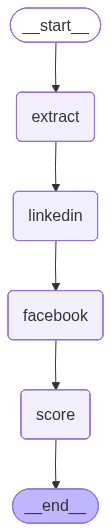


🚀 Starting LangGraph Automated Verification Pipeline...

🔍 Processing: CV_1.pdf
   -> [Node 1] Extracting CV information (Strict Mode)...
      [Log] Cleaned Extracted Info: {'name': 'John Smith', 'industry': 'Marketing'}
   -> [Node 2] Querying LinkedIn (Multi-Agent: Retrieve & Select Mode)...
      [Log] LinkedIn Retrieve: Searching with args -> {'q': 'John Smith', 'limit': 5, 'fuzzy': True, 'industry': 'Marketing'}
      [Log] Found 5 candidate(s). Expanding full profiles...
      [Log] Calling LLM to select best match and evaluate confidence...
      [Success] Selected ID: 9 | Confidence: high | Reason: The candidate CV and Profile 9 both list the name John Smith, are located in Singapore, and have an Engineer role at ByteDance starting in 2020. Furthermore, both indicate a Bachelor of Science in Marketing from McGill University, graduating in 2009. All key details and timelines align perfectly.
   -> [Node 3] Querying Facebook (Multi-Agent: Retrieve & Select Mode)...
      [Log] 

In [8]:
from IPython.display import Image, display
# 5. Assemble and Compile LangGraph
workflow = StateGraph(VerificationState)
workflow.add_node("extract", extract_node)
workflow.add_node("linkedin", linkedin_node)
workflow.add_node("facebook", facebook_node)
workflow.add_node("score", score_node)

workflow.set_entry_point("extract")
workflow.add_edge("extract", "linkedin")
workflow.add_edge("linkedin", "facebook")
workflow.add_edge("facebook", "score")
workflow.add_edge("score", END)

app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

# 6. Execute Batch Verification & Final Evaluation
final_scores = []
generated_reports = []

print("\n🚀 Starting LangGraph Automated Verification Pipeline...\n")

for cv_data in all_cvs:
    file_name = cv_data["file"]
    cv_text = cv_data["text"]
    print(f"🔍 Processing: {file_name}")

    initial_state = {"cv_text": cv_text}

    # Execute Graph
    final_state = await app.ainvoke(initial_state)

    score = final_state.get("final_score", 0.5)
    score = max(0.0, min(1.0, float(score)))

    final_scores.append(score)
    generated_reports.append({
        "file": file_name,
        "score": score,
        "report": final_state.get("report_content", ""),
        "discrepancies": final_state.get("discrepancies", [])
    })

    print(f"✅ {file_name} Verification complete | Final score: {score}")
    print("-" * 60)

In [9]:
def print_readable_results(results):
    for item in results:
        print("=" * 60)
        print(f"📄 File: {item['file']}")
        print(f"🎯 Score: {item['score']}")
        print("-" * 60)

        print("📝 Report:")
        print(item['report'])
        print("\n⚠️ Discrepancie:")

        if not item['discrepancies']:
            print("  - None")
        else:
            for disc in item['discrepancies']:
                print(f"  - {disc}")

        print("=" * 60)
        print("\n")


print_readable_results(generated_reports)

📄 File: CV_1.pdf
🎯 Score: 0.85
------------------------------------------------------------
📝 Report:
The CV for John Smith demonstrates a high degree of reliability, primarily supported by strong corroboration from the LinkedIn profile. The LinkedIn data, with a high match confidence, aligns perfectly with the CV's claims regarding employment at ByteDance as an Engineer from 2020 to present, and education at McGill University with a BSc in Marketing, graduating in 2009. While the Facebook profile, with moderate match confidence, lists a different current employer and title (Scientist at Traveloka), this is classified as missing evidence rather than a direct conflict due to the lower confidence level of the Facebook match. No internal inconsistencies were found within the CV. The overall consistency with the primary verification source leads to a high confidence score.

⚠️ Discrepancie:
  - [Moderate] (MISSING EVIDENCE) The CV's current employment as Engineer at ByteDance is not corrob

In [10]:
#cv4 lk_id:91, fb_id: 4

# This block provides you some tests to get faminilar with our MCP server

# # Test 1: Search Facebook users (exact match)
# await tools[0].ainvoke({'q': "Alex Chan", 'limit': 5})

# # Test 2: Search Facebook users (fuzzy match with typo)
# await tools[0].ainvoke({'q': "Alx Chn", 'limit': 5, 'fuzzy': True})

# # Test 3: Get Facebook profile
# await tools[1].ainvoke({'user_id': 213})

# # Test 4: Get Facebook mutual friends
# await tools[2].ainvoke({'user_id_1': 123, 'user_id_2': 456})

# # Test 5: Search LinkedIn people (exact match)
# await tools[3].ainvoke({'q': "Python", 'location': "Hong Kong", 'limit': 5})
#await tools[3].ainvoke({'q': "Minh Pham", 'industry': "Design", 'limit':5, 'fuzzy': False})

# # Test 6: Search LinkedIn people (fuzzy match with typo)
# await tools[3].ainvoke({'q': "Python", 'location': "Hong Kong", 'limit': 5, 'fuzzy': True})

# # Test 7: Get LinkedIn profile
await tools[4].ainvoke({'person_id': 91})

# Test 8: Get LinkedIn interactions
#await tools[5].ainvoke({'person_id': 456})

[{'type': 'text',
  'text': '{"id":91,"name":"Rahul Sharma","headline":"Legal Professional","city":"Cebu","country":"Philippines","industry":"Legal","status":"student","years_experience":2,"summary":"Stock scientist unit. Fact explain particular including represent any night meeting. Through water both past road. Western animal focus treatment federal top number. Lot development safe side on senior.","skills":[{"name":"Compliance","proficiency":5},{"name":"Litigation","proficiency":5},{"name":"Contract Review","proficiency":2}],"experience":[{"company":"Microsoft","title":"Engineer","seniority":"junior","start_year":2020,"end_year":2025,"is_current":true}],"education":[{"school":"Tsinghua University","degree":"PhD","field":"Legal","start_year":2014,"end_year":2019}]}',
  'id': 'lc_e5c5f932-b25c-42ae-9722-9929d3d9e361'}]

# Evaluation code

In the test phase, you will be given 5 CV files with fixed names:

    CV_1.pdf, CV_2.pdf, CV_3.pdf, CV_4.pdf, CV_5.pdf

Your system must process these CVs and output a list of 5 scores,
one score per CV, in the same order:

    scores = [s1, s2, s3, s4, s5]

Each score must be a float in the range [0, 1], representing the
reliability or confidence that the CV is valid (or meets the task criteria).

The ground-truth labels are binary:

    groundtruth = [0 or 1, ..., 0 or 1]

Each CV is evaluated independently using a threshold of 0.5:

- If score > 0.5 and groundtruth == 1 → Full credit
- If score ≤ 0.5 and groundtruth == 0 → Full credit
- Otherwise → No credit

In other words, 0.5 is the decision threshold.

- Each CV contributes equally.
- Final score = (number of correct decisions) / 5


In [11]:
# =====================================================
#  Evaluation code
# =====================================================

def evaluate(scores, groundtruth, threshold=0.5):
    """
    scores: list of floats in [0, 1], length = 5
    groundtruth: list of ints (0 or 1), length = 5
    """
    assert len(scores) == 5
    assert len(groundtruth) == 5

    correct = 0
    decisions = []

    for s, gt in zip(scores, groundtruth):
        pred = 1 if s > threshold else 0
        decisions.append(pred)
        if pred == gt:
            correct += 1

    final_score = correct / len(scores)

    return {
        "decisions": decisions,
        "correct": correct,
        "total": len(scores),
        "final_score": final_score
    }


In [12]:
scores = final_scores
groundtruth = [1, 1, 1, 0, 0] # Do not modify

result = evaluate(scores, groundtruth)
print(result)


{'decisions': [1, 1, 1, 0, 0], 'correct': 5, 'total': 5, 'final_score': 1.0}
